In [1]:
from statistics import mode
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
def read_data(index, is_train):
    s = "DT_csv/"
    num = str(index)
    if len(num) == 1:
        num = "0" + num
    typer = "_train" if is_train else "_test"
    s = s + num + typer + ".csv"
    data = pd.read_csv(s)
    y = data.iloc[:, -1]
    x = data.iloc[:, :-1]
    return x.to_numpy(), y.to_numpy()


In [3]:
def get_tree_scores():
    criteries = ["gini", "entropy"]
    splitters = ["best", "random"]
    for num in range(1, 22):
        X_train, y_train = read_data(num, True)
        X_test, y_test = read_data(num, False)
        best = 0
        params = (0, "gini", "best")
        for height in range(1, 20):
            for criteria in criteries:
                for splitter in splitters:
                    tree = DecisionTreeClassifier(max_depth=height, criterion=criteria, splitter=splitter)
                    tree.fit(X_train, y_train)
                    y_pred = tree.predict(X_test)
                    score = accuracy_score(y_test, y_pred)
                    if score > best:
                        best = score
                        params = (height, criteria, splitter)
        print("Dataset", num, "best_score:", best, "; params:", params)
get_tree_scores()

Dataset 1 best_score: 0.9997429966589566 ; params: (3, 'entropy', 'best')
Dataset 2 best_score: 0.6987277353689567 ; params: (9, 'entropy', 'best')
Dataset 3 best_score: 1.0 ; params: (1, 'gini', 'best')
Dataset 4 best_score: 0.992 ; params: (5, 'entropy', 'best')
Dataset 5 best_score: 0.9956709956709957 ; params: (1, 'gini', 'best')
Dataset 6 best_score: 0.9988962472406181 ; params: (3, 'entropy', 'best')
Dataset 7 best_score: 0.9967441860465116 ; params: (3, 'entropy', 'best')
Dataset 8 best_score: 0.997920997920998 ; params: (2, 'gini', 'best')
Dataset 9 best_score: 0.8411764705882353 ; params: (5, 'entropy', 'best')
Dataset 10 best_score: 0.9979879275653923 ; params: (4, 'entropy', 'best')
Dataset 11 best_score: 0.999195171026157 ; params: (1, 'gini', 'best')
Dataset 12 best_score: 0.8770698849284311 ; params: (10, 'entropy', 'best')
Dataset 13 best_score: 0.6522935779816513 ; params: (7, 'entropy', 'best')
Dataset 14 best_score: 0.990351215746816 ; params: (5, 'entropy', 'best')
D

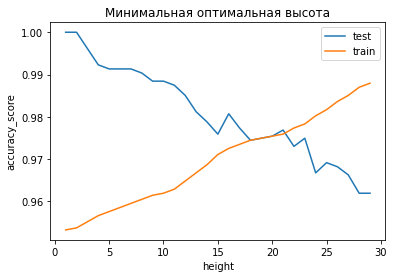

In [4]:
def draw_graphics(ind, criteria, splitter, name):
    X_train, y_train = read_data(ind, True)
    X_test, y_test = read_data(ind, False)
    scores_test = []
    scores_train = []
    heights = []
    for height in range(1, 30):
        tree = DecisionTreeClassifier(max_depth=height, criterion=criteria, splitter=splitter)
        tree.fit(X_train, y_train)
        y_pred = tree.predict(X_test)
        y_train_pred = tree.predict(X_train)
        score = accuracy_score(y_test, y_pred)
        scores_test.append(score)
        scores_train.append(accuracy_score(y_train, y_train_pred))
        heights.append(height)
    plt.title(name)
    plt.xlabel("height")
    plt.ylabel("accuracy_score")
    plt.plot(heights, scores_test, label="test")
    plt.plot(heights, scores_train, label="train")
    plt.legend()
draw_graphics(3, "gini", "best", "Минимальная оптимальная высота")

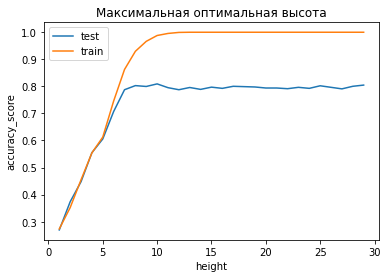

In [5]:
draw_graphics(21, "entropy", "best", "Максимальная оптимальная высота")


In [6]:
def get_forest_scores(num):
    for i in range(1, 22):
        X_train, y_train = read_data(i, True)
        X_test, y_test = read_data(i, False)
        forest = [DecisionTreeClassifier() for i in range(num)]
        for tree in forest:
            tree.fit(X_train, y_train)
        results_test = []
        results_train = []
        for tree in forest:
            results_test.append(tree.predict(X_test))
            results_train.append(tree.predict(X_train))
        y_pred = []
        for ind in range(len(results_test[0])):
            a = []
            for j in range(len(forest)):
                a.append(results_test[j][ind])
            y_pred.append(max(set(a), key=a.count))
        y_train_pred = []
        for ind in range(len(results_train[0])):
            a = []
            for j in range(len(forest)):
                a.append(results_train[j][ind])
            y_train_pred.append(max(set(a), key=a.count))
        print(i, ": Test_score:", accuracy_score(y_test, y_pred), "Train score:", accuracy_score(y_train, y_train_pred))
        
get_forest_scores(6)

1 : Test_score: 0.9354921613980982 Train score: 1.0
2 : Test_score: 0.6315521628498728 Train score: 1.0
3 : Test_score: 0.9522661523625844 Train score: 1.0
4 : Test_score: 0.9551304347826087 Train score: 1.0
5 : Test_score: 0.9588744588744589 Train score: 1.0
6 : Test_score: 0.9486754966887417 Train score: 1.0
7 : Test_score: 0.9441860465116279 Train score: 1.0
8 : Test_score: 0.9916839916839917 Train score: 1.0
9 : Test_score: 0.7764705882352941 Train score: 1.0
10 : Test_score: 0.9400402414486921 Train score: 1.0
11 : Test_score: 0.9424547283702214 Train score: 1.0
12 : Test_score: 0.8484423238843671 Train score: 1.0
13 : Test_score: 0.5899082568807339 Train score: 1.0
14 : Test_score: 0.9258973369355461 Train score: 1.0
15 : Test_score: 0.9579579579579579 Train score: 1.0
16 : Test_score: 0.9404984423676013 Train score: 1.0
17 : Test_score: 0.803461753210497 Train score: 1.0
18 : Test_score: 0.8808637379002234 Train score: 1.0
19 : Test_score: 0.7666916729182296 Train score: 1.0
20 